In [42]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, zero_one_loss
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

import UFI

In [43]:
data = pd.read_csv("data.txt", sep = " ")

In [44]:
data = data.replace("X", np.nan)
data = data.dropna()

del data["loc"]

In [45]:
data["edit"][data["edit"] == "+"] = 1
data["edit"][data["edit"] == "-"] = 0
data.edit = data.edit.astype(int)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [46]:
print(data.shape)
data.head()

(876, 45)


,edit,-20,-19,-18,-17,-16,-15,-14,-13,-12,...,14,15,16,17,18,19,20,cp,fe,dfe
0,1,G,C,A,T,T,G,C,T,T,...,G,A,G,T,T,C,C,P0,-5.6,-0.6
1,1,C,G,A,A,C,T,A,C,C,...,A,G,A,A,C,A,C,P1,-9.0,0.2
2,1,C,A,A,T,T,A,G,C,C,...,C,T,G,G,T,G,C,P2,-12.9,0.0
3,1,A,T,C,G,A,G,A,T,T,...,T,C,T,C,G,A,T,P2,-16.3,0.0
4,1,T,G,T,T,C,C,G,C,A,...,T,T,T,T,C,C,C,P0,-6.1,-0.5


In [47]:
data.columns

Index(['edit', '-20', '-19', '-18', '-17', '-16', '-15', '-14', '-13', '-12',
       '-11', '-10', '-9', '-8', '-7', '-6', '-5', '-4', '-3', '-2', '-1', '0',
       '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', 'cp', 'fe', 'dfe'],
      dtype='object')

In [48]:
data.to_csv("RNA_cleaned.csv", index = False)

In [49]:
data_dummy = pd.get_dummies(data)

print(data_dummy.shape)
data_dummy.head()

(876, 168)


,edit,fe,dfe,-20_A,-20_C,-20_G,-20_T,-19_A,-19_C,-19_G,...,19_G,19_T,20_A,20_C,20_G,20_T,cp_P0,cp_P1,cp_P2,cp_PX
0,1,-5.6,-0.6,0,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,1,-9.0,0.2,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,1,-12.9,0.0,0,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
3,1,-16.3,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,1,-6.1,-0.5,0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0


In [50]:
y = data_dummy["edit"].values

X = data_dummy.iloc[:,1:]

In [97]:
All = []

for rep in range(100):
    
    cls = RandomForestClassifier(n_estimators = 100)
    cls.fit(X, y)
    
    imp = cls.feature_importances_

    imp_combined = [0] * (data.shape[1] - 1)

    imp_combined[-2:] = imp[:2]

    for i in range(0, 20):

        imp_combined[i] = sum(imp[(4 * i + 2):(4 * i + 6)])

    imp_combined[20] = imp[82]

    for i in range(21, len(imp_combined) - 2):

        imp_combined[i] = sum(imp[(4 * i - 1):(4 * i + 3)])
    
    All.append(imp_combined)

imp = np.average(All, axis = 0)

std = np.std(All, axis = 0)
    

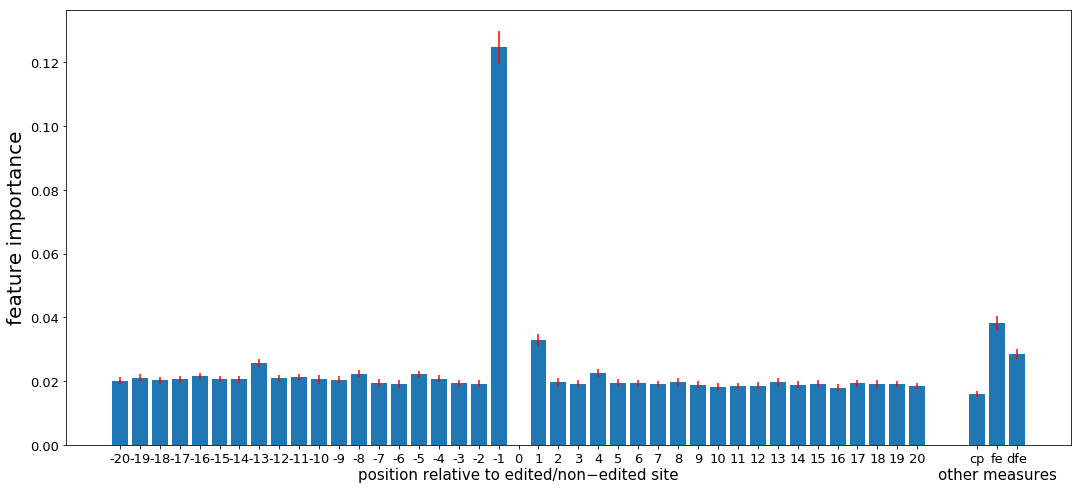

In [98]:
plt.figure(figsize=(18, 8))

pos = np.append(np.arange(-20, 21), [23, 24, 25])
bars = np.append(np.arange(-20, 21), ['cp', 'fe', 'dfe'])

plt.bar(pos, imp, yerr = std, ecolor = "red")
plt.xticks(pos, bars)
ax = plt.gca()
ax.tick_params(labelsize = 13)
ax.set_xticks([0, 24],minor = True)
ax.set_xticklabels(["position relative to edited/non−edited site", "other measures"], minor = True, fontsize = 15)
ax.tick_params(axis = 'x', which = 'minor', pad = 20)

plt.ylabel("feature importance", fontsize = 20)

plt.savefig("SI_on_CtoU.png")

In [85]:
All = []

for rep in range(100):
    
    if rep % 5 == 0:
        print(rep)
    
    cls = RandomForestClassifier(n_estimators = 100)
    cls.fit(X, y)
    
    imp = UFI.cls(cls, X.values, y)

    imp_combined = [0] * (data.shape[1] - 1)

    imp_combined[-2:] = imp[:2]

    for i in range(0, 20):

        imp_combined[i] = sum(imp[(4 * i + 2):(4 * i + 6)])

    imp_combined[20] = imp[82]

    for i in range(21, len(imp_combined) - 2):

        imp_combined[i] = sum(imp[(4 * i - 1):(4 * i + 3)])
    
    All.append(imp_combined)

imp = np.average(All, axis = 0)

std = np.std(All, axis = 0)
    

0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95


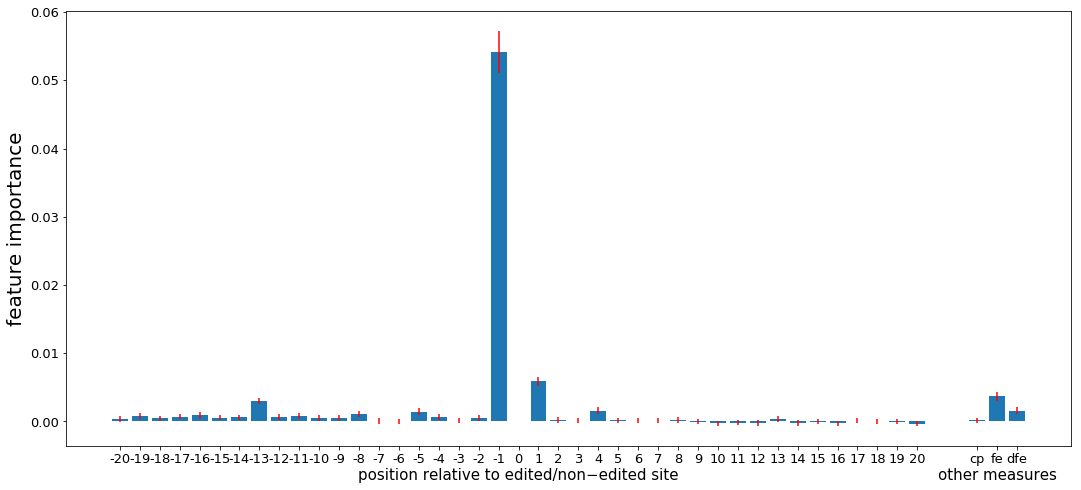

In [96]:
plt.figure(figsize=(18, 8))

pos = np.append(np.arange(-20, 21), [23, 24, 25])
bars = np.append(np.arange(-20, 21), ['cp', 'fe', 'dfe'])

plt.bar(pos, imp, yerr = std, ecolor = "red")
plt.xticks(pos, bars)

ax = plt.gca()
ax.tick_params(labelsize = 13)
ax.set_xticks([0, 24],minor = True)
ax.set_xticklabels(["position relative to edited/non−edited site", "other measures"], minor = True, fontsize = 15)
ax.tick_params(axis = 'x', which = 'minor', pad = 20)

plt.ylabel("feature importance", fontsize = 20)

plt.savefig("UFI_on_CtoU.png")